# LOGISTIC REGRESSION - TITANIC SURVIVAL DATASET

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [72]:
df = pd.read_csv("train.csv")

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Convert 'Sex' to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Fill missing values
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [17]:
# Drop any rows where target is missing
df = df.dropna(subset=["Survived"])

# Select features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X = df[features].values.astype(float)
y = df["Survived"].values.astype(float)

In [22]:
# Normalize
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1   # avoid division by zero
X_norm = (X - X_mean) / X_std

# Add bias column because model may not pass through the origin
N, d = X_norm.shape
X_design = np.hstack([np.ones((N, 1)), X_norm])

# Train-test split
split = int(0.8 * N)
X_train = X_design[:split]
y_train = y[:split]
X_test = X_design[split:]
y_test = y[split:]

In [73]:
def sigmoid(z):
    z = np.clip(z, -500, 500)   # avoids overflow in exp()
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w):
    return sigmoid(np.dot(X, w))

def loss_cross_entropy(X, y, w):
    y_pred = predict_proba(X, w)
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def gradient(X, y, w):
    y_pred = predict_proba(X, w)
    grad = X.T.dot(y_pred - y) / len(y)
    return grad

In [74]:
# Initialize weights and hyperparameters
w = np.zeros(X_train.shape[1])
learning_rate = 0.01
epochs = 7000
losses = []
epoch_list = []


for epoch in range(epochs):
    grad = gradient(X_train, y_train, w)
    w -= learning_rate * grad

    # Monitor progress
    if epoch % 500 == 0:
        loss = loss_cross_entropy(X_train, y_train, w)
        losses.append(loss)  # store loss
        epoch_list.append(epoch)
        print(f"Epoch {epoch}: Loss={loss:.4f}")
        print(f"Gradient mean: {grad.mean():.6f}, max: {grad.max():.6f}")


Epoch 0: Loss=0.6920
Gradient mean: -0.011925, max: 0.153670
Epoch 500: Loss=0.4937
Gradient mean: 0.006063, max: 0.041086
Epoch 1000: Loss=0.4673
Gradient mean: 0.005928, max: 0.022444
Epoch 1500: Loss=0.4601
Gradient mean: 0.004647, max: 0.015031
Epoch 2000: Loss=0.4574
Gradient mean: 0.003516, max: 0.010746
Epoch 2500: Loss=0.4562
Gradient mean: 0.002648, max: 0.007915
Epoch 3000: Loss=0.4557
Gradient mean: 0.001999, max: 0.005933
Epoch 3500: Loss=0.4554
Gradient mean: 0.001515, max: 0.004497
Epoch 4000: Loss=0.4552
Gradient mean: 0.001151, max: 0.003436
Epoch 4500: Loss=0.4551
Gradient mean: 0.000878, max: 0.002640
Epoch 5000: Loss=0.4550
Gradient mean: 0.000672, max: 0.002036
Epoch 5500: Loss=0.4550
Gradient mean: 0.000515, max: 0.001575
Epoch 6000: Loss=0.4550
Gradient mean: 0.000396, max: 0.001220
Epoch 6500: Loss=0.4550
Gradient mean: 0.000305, max: 0.000947


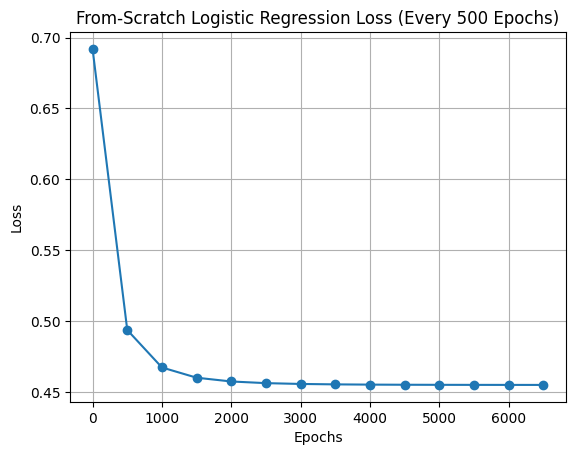

In [75]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("From-Scratch Logistic Regression Loss (Every 500 Epochs)")
plt.grid(True)
plt.show()

In [76]:
# Predict
y_test_pred_proba = predict_proba(X_test, w)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

# Accuracy
accuracy = np.mean(y_test_pred == y_test)
print("\nFinal Test Accuracy:", round(accuracy * 100, 2), "%")


Final Test Accuracy: 83.24 %


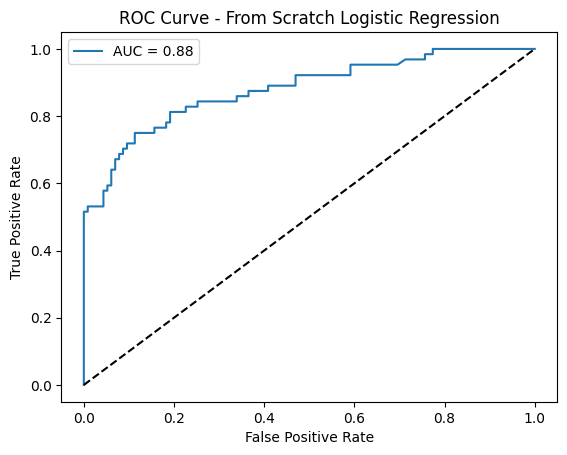

In [77]:
from sklearn.metrics import roc_curve, auc

# From-scratch predicted probabilities
y_prob = predict_proba(X_test, w)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - From Scratch Logistic Regression")
plt.legend()
plt.show()


In [78]:
# Compare with Scikit-learn Logistic Regression
# Initialize the model
model = LogisticRegression(max_iter=5000)  # match the number of epochs for fairness

# Train (fit) the model on the same training data
model.fit(X_train, y_train)

# Predict on the same test data
y_pred_sklearn = model.predict(X_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Compare with from-scratch model
print("\n--- COMPARISON ---")
print(f"From Scratch Accuracy: {accuracy:.2f}%")
print(f"Scikit-learn Accuracy: {accuracy_sklearn * 100:.2f}%")


--- COMPARISON ---
From Scratch Accuracy: 0.83%
Scikit-learn Accuracy: 83.80%


In [79]:
print("From scratch prediction variable available?", 'y_pred' in locals())
#since y_pred don;t exists in its memory
y_pred = (predict_proba(X_test, w) >= 0.5).astype(int)

# Compare predictions directly
similar = np.mean(y_pred.round() == y_pred_sklearn)
print(f"Prediction similarity between models: {similar * 100:.2f}%")

From scratch prediction variable available? True
Prediction similarity between models: 99.44%


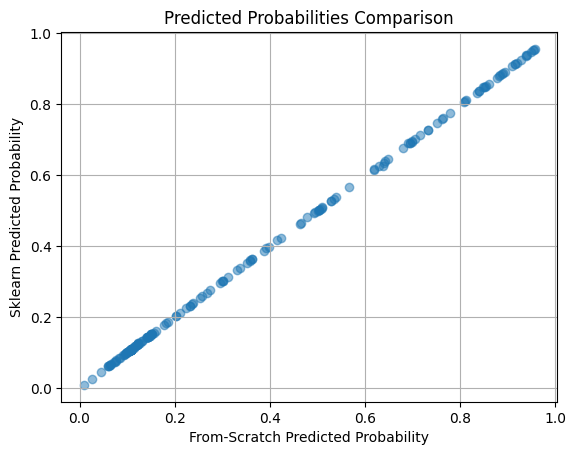

In [80]:
# From-scratch model probabilities
y_prob_scratch = predict_proba(X_test, w)

# Sklearn model probabilities
y_prob_sklearn = model.predict_proba(X_test)[:, 1]  # probability of class 1

plt.scatter(y_prob_scratch, y_prob_sklearn, alpha=0.5)
plt.xlabel("From-Scratch Predicted Probability")
plt.ylabel("Sklearn Predicted Probability")
plt.title("Predicted Probabilities Comparison")
plt.grid(True)
plt.show()

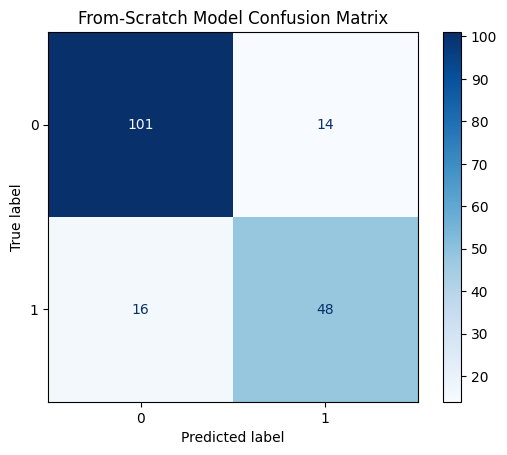

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("From-Scratch Model Confusion Matrix")
plt.show()